In [18]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import T5TokenizerFast, T5ForConditionalGeneration

# Load the model and tokenizer
model = T5ForConditionalGeneration.from_pretrained('/workspace/saradhi_pg/Nil/Work_3/results/updated_aaec_para-Key-Phrases-LAST-google/flan-t5-base-steps20000-SL1024-BS16/run_1/best_checkpoint')
tokenizer = T5TokenizerFast.from_pretrained('/workspace/saradhi_pg/Nil/Work_3/results/updated_aaec_para-Key-Phrases-LAST-google/flan-t5-base-steps20000-SL1024-BS16/run_1/best_checkpoint')

# Input text
input_text = "Secondly, dancing can represent to civilization of that culture. For instance, I have seen many western movies that when a kingdom have visitor from another kingdom, king or queen would dance to show a splendid of their kingdom culture. The way of movement, the way that they costume and also a music while they dance. All this is a civilization of their culture.\n"
input_ids = tokenizer(input_text, return_tensors='pt').input_ids


# Run the forward pass to get attention weights
outputs = model(input_ids=input_ids, decoder_input_ids=input_ids, output_attentions=True)

# Extract attention weights from the decoder (e.g., last layer)
decoder_attentions = outputs.decoder_attentions  # Attention from all decoder layers

# Example: Use attention from the last decoder layer
decoder_attention = decoder_attentions[-1]  # Last decoder layer's attention
attention_head = decoder_attention[0, 0, :, :].detach().cpu().numpy()  # Extract attention for head 0

# Convert input token IDs back to tokens
input_tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

# Decode tokens into words
decoded_input_words = []
word_attention_scores = []

current_word = ""
current_word_attention = []

# Iterate over tokens to group subwords into words and aggregate attention
for i, token in enumerate(input_tokens):
    if token.startswith('▁'):  # New word starts with '▁' in SentencePiece
        # If we have a current word, finalize it and its attention score
        if current_word_attention:
            avg_attention = sum(current_word_attention) / len(current_word_attention)
            word_attention_scores.append(avg_attention)
            decoded_input_words.append(current_word)

        # Start new word
        current_word = token.replace('▁', '')  # Remove '▁'
        current_word_attention = [attention_head[:, i].mean()]  # Start attention list for new word
    else:
        # Append subword to the current word
        current_word += token
        current_word_attention.append(attention_head[:, i].mean())  # Add attention for subword

# Add the last word if it exists
if current_word_attention:
    avg_attention = sum(current_word_attention) / len(current_word_attention)
    word_attention_scores.append(avg_attention)
    decoded_input_words.append(current_word)

# Print out words and their corresponding attention scores
for word, attention in zip(decoded_input_words, word_attention_scores):
    print(f"Word: {word}, Attention Score: {attention}")


# # Generate label-augmented text
# input_text = "Secondly, dancing can represent to civilization of that culture. For instance, I have seen many western movies that when a kingdom have visitor from another kingdom, king or queen would dance to show a splendid of their kingdom culture. The way of movement, the way that they costume and also a music while they dance. All this is a civilization of their culture.\n"
# input_ids = tokenizer.encode(input_text, return_tensors='pt')


# output = model.generate(input_ids, max_length=1024, num_return_sequences=1, num_beams = 8)
# generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

# print("Generated text:", generated_text)


Word: Secondly,, Attention Score: 0.013544564445813497
Word: dancing, Attention Score: 0.01614217273890972
Word: can, Attention Score: 0.00900303479284048
Word: represent, Attention Score: 0.022713791579008102
Word: to, Attention Score: 0.022406896576285362
Word: civilization, Attention Score: 0.002792251529172063
Word: of, Attention Score: 0.014751847833395004
Word: that, Attention Score: 0.01237777341157198
Word: culture., Attention Score: 0.014134675497189164
Word: For, Attention Score: 0.013191481120884418
Word: instance,, Attention Score: 0.009923024103045464
Word: I, Attention Score: 0.010557185858488083
Word: have, Attention Score: 0.0134521359577775
Word: seen, Attention Score: 0.013511338271200657
Word: many, Attention Score: 0.006635879632085562
Word: western, Attention Score: 0.010424738749861717
Word: movies, Attention Score: 0.01964745670557022
Word: that, Attention Score: 0.012005368247628212
Word: when, Attention Score: 0.01694963313639164
Word: a, Attention Score: 0.010

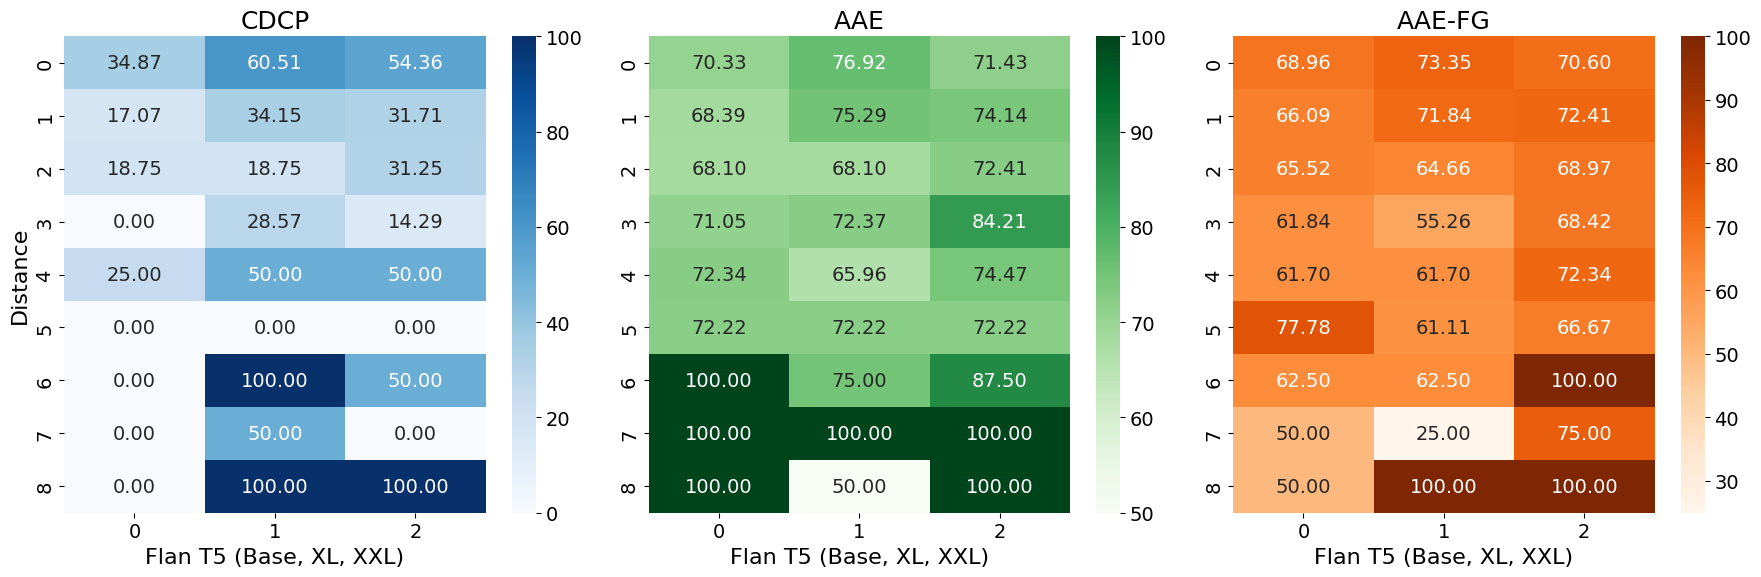

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

# Accuracy data
data_cdcp = np.array([
    [34.87, 60.51, 54.36],
    [17.07, 34.15, 31.71],
    [18.75, 18.75, 31.25],
    [0.00, 28.57, 14.29],
    [25.00, 50.00, 50.00],
    [0.00, 0.00, 0.00],
    [0.00, 100.00, 50.00],
    [0.00, 50.00, 0.00],
    [0.00, 100.00, 100.00]
])

data_aae = np.array([
    [70.33, 76.92, 71.43],
    [68.39, 75.29, 74.14],
    [68.10, 68.10, 72.41],
    [71.05, 72.37, 84.21],
    [72.34, 65.96, 74.47],
    [72.22, 72.22, 72.22],
    [100.00, 75.00, 87.50],
    [100.00, 100.00, 100.00],
    [100.00, 50.00, 100.00]
])

data_aae_fg = np.array([
    [68.96, 73.35, 70.60],
    [66.09, 71.84, 72.41],
    [65.52, 64.66, 68.97],
    [61.84, 55.26, 68.42],
    [61.70, 61.70, 72.34],
    [77.78, 61.11, 66.67],
    [62.50, 62.50, 100.00],
    [50.00, 25.00, 75.00],
    [50.00, 100.00, 100.00]
])

# Plotting heatmaps for each dataset
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Heatmap for CDCP
sns.heatmap(data_cdcp, annot=True, fmt='.2f', cmap='Blues', ax=axes[0])  # Ensure two decimal formatting
axes[0].set_title('CDCP', fontsize=18)
axes[0].set_xlabel('Flan T5 (Base, XL, XXL)', fontsize=16)
axes[0].set_ylabel('Distance', fontsize=16)

# Heatmap for AAE
sns.heatmap(data_aae, annot=True, fmt='.2f', cmap='Greens', ax=axes[1])
axes[1].set_title('AAE', fontsize=18)
axes[1].set_xlabel('Flan T5 (Base, XL, XXL)', fontsize=16)

# Heatmap for AAE-FG
sns.heatmap(data_aae_fg, annot=True, fmt='.2f', cmap='Oranges', ax=axes[2])
axes[2].set_title('AAE-FG', fontsize=18)
axes[2].set_xlabel('Flan T5 (Base, XL, XXL)', fontsize=16)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()